# __Capstone Project - The Battle of the Neighborhoods - Complete__

## __Topic: Finding the best Mexican Restaurants in New York city__

### __Table of contents__ 

1. _Introduction: Business Problem_
2. _Data_
3. _Data Extraction Approach_
4. _Analysis and Results_
5. _Conclusion_

### __Introduction: Business Problem__

“There’s no good __Mexican food__ in New York City.”

That’s what most people say, especially the Californians and the Texans, and that’s when they’re putting it politely. In an early scene of the second episode of __Ugly Delicious__, as David Chang talks about his preferences for tortas and burritos over tacos, the late Jonathan Gold jokingly replies, “You’re from New York. Of course you don’t like tacos. You haven’t had good tacos.”

Gold makes the joke knowing it belies the truth. See, there are two major camps of New York Mexican food haters: Folks from out west visiting New York — well, Manhattan — who are looking for the sit-down Tex-Mex or Cal-Mex places where one can order plates by the number, with sour cream, enchilada gravy, and melted yellow cheese. Then there are the people who only want to go to the kinds of places where one orders in Spanish and the tacos come with onion, cilantro, slices of lime, and fresh, colorful salsas; they claim that there’s no good Mexican food in New York because, well, there are not as many __Mexicans__ here to make it. 

Well to prove this wrong and as a part of my project, I will list and visualize all the major areas of New York city that have best Mexican eat outs.

### __Target Audience__

This project will benefit Mexican expats, aspiring Restaurant owners and Mexican food enthusiasts equally by answering the following questions too:

1. Which is the best place to stay if I prefer Mexican cuisine ?
2. What is best location in New York city for Mexican cuisine ?
3. Which areas have potential Mexican restaurant market ?
4. What areas lack Mexican eatries ?

### __Data__

For this project we will require the following data set:  

1. New York city data that contains list of Boroughs, Neighborhoods along with their latitude and longitude.
   Data source : https://cocl.us/new_york_dataset . This data set contains all the required information related to various        neighborhoods of New York city. 
2. Mexican restaurants in each neighborhood of New York city.
   Data source : Fousquare API. By using this api we will get all the venues in each New York neighborhoods. We can filter        these venues to get only Mexican restaurants.
3. GeoSpace data. Data source : https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm. By using this geo    space data we will get the New York neighborhood boundaries that will help us visualize choropleth map.

### __Data Extraction Approach__

1. We will collect the New York city data from https://cocl.us/new_york_dataset
2. Using __FourSquare API__ we will find all venues for each neighborhood.
3. We will filter out all venues that are Mexican restaurants.
4. We will Find rating , tips and likes count for each Mexican restaurants using __FourSquare API__.
5. By using __rating__ for each resturant , we will sort the data.
6. To get the latitude and longitude coordinates we will use __Geopy__ library (Python)
6. We will visualize the ranking of neighborhoods using __folium__ library (python).

### __Analysis and Results__

1. Import pandas and numpy for handling data
2. Import request module for using FourSquare API.
3. Import geopy to get co-ordinates of City of New York.
4. Import folium to visualize the results on a map

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

In [3]:
!conda install -c conda-forge geocoder --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          59 KB

The following NEW packages will be INSTALLED:

    geocoder: 1.38.1-py_1 conda-forge
    ratelim:  0.1.6-py_2  conda-forge


geocoder-1.38.1      | 53 KB     | ##################################### | 100% 
ratelim-0.1.6        | 6 KB      | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [4]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.20.0         | 57 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [5]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
import geocoder
import os
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import math



print('Libraries imported.')

Libraries imported.


Now we define a function to get the geocodes i.e latitude and longitude of a given location using geopy

In [6]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

We define a function to interact with FourSquare API and get top 100 venues within a radius of 1000 metres for a given latitude and longitude. Below function will return us the venue id, venue name and category.

In [7]:
CLIENT_ID = 'YRO42INVPZ3MOZE11GE44KV0DJWDW4WYTAO3FKAYA4R0LNMG' # your Foursquare ID
CLIENT_SECRET = 'NELI1NQ0LCPLAG4UGRGRJLQJF3JYWGD5GUXKUSVO2GSRDZDW' # your Foursquare Secret
VERSION = '20191222'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YRO42INVPZ3MOZE11GE44KV0DJWDW4WYTAO3FKAYA4R0LNMG
CLIENT_SECRET:NELI1NQ0LCPLAG4UGRGRJLQJF3JYWGD5GUXKUSVO2GSRDZDW


In [8]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Now we will define a function to get venue details like count , rating , tip counts for a given venue id. This will be used for ranking.

In [9]:
def get_venue_details(venue_id):
        

    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Now we define a funtion to get the new york city data such as Boroughs, Neighborhoods along with their
latitude and longitude.

In [10]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

We will call the above funtion to get the new york city data.

In [11]:
# get new york data
new_york_data=get_new_york_data()

In [12]:
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [13]:
new_york_data.shape

(306, 4)

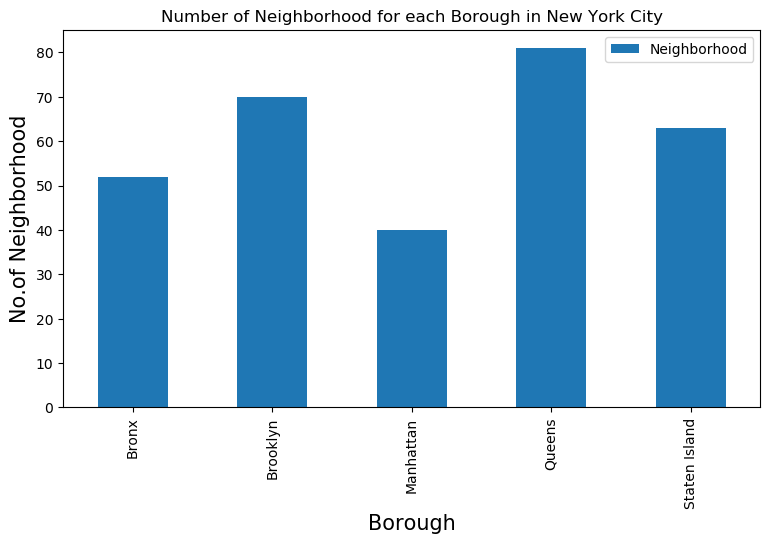

In [14]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We see that Queens has highest number of neighborhoods. Now we will collect Mexican restaurants for each Neighborhood

In [29]:
# prepare neighborhood list that contains Mexican restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
Mexican_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    Mexican_restaurants=venues[venues['Category']=='Mexican Restaurant']   
    print('(',count,'/',len(new_york_data),')','Mexican Restaurants in '+Neighborhood+', '+Borough+':'+str(len(Mexican_restaurants)))
    for restaurant_detail in Mexican_restaurants.values.tolist():
        id, name , category=restaurant_detail
        Mexican_rest_ny = Mexican_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Mexican Restaurants in Wakefield, Bronx:0
( 2 / 306 ) Mexican Restaurants in Co-op City, Bronx:2
( 3 / 306 ) Mexican Restaurants in Eastchester, Bronx:0
( 4 / 306 ) Mexican Restaurants in Fieldston, Bronx:2
( 5 / 306 ) Mexican Restaurants in Riverdale, Bronx:2
( 6 / 306 ) Mexican Restaurants in Kingsbridge, Bronx:6
( 7 / 306 ) Mexican Restaurants in Marble Hill, Manhattan:4
( 8 / 306 ) Mexican Restaurants in Woodlawn, Bronx:0
( 9 / 306 ) Mexican Restaurants in Norwood, Bronx:3
( 10 / 306 ) Mexican Restaurants in Williamsbridge, Bronx:0
( 11 / 306 ) Mexican Restaurants in Baychester, Bronx:2
( 12 / 306 ) Mexican Restaurants in Pelham Parkway, Bronx:1
( 13 / 306 ) Mexican Restaurants in City Island, Bronx:0
( 14 / 306 ) Mexican Restaurants in Bedford Park, Bronx:3
( 15 / 306 ) Mexican Restaurants in University Heights, Bronx:0
( 16 / 306 ) Mexican Restaurants in Morris Heights, Bronx:0
( 17 / 306 ) Mexican Restaurants in Fordham, Bronx:1
( 18 / 306 ) Mexican Restaurants in Ea

In [19]:
# prepare neighborhood list that contains Mexican restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
Mexican_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    Mexican_restaurants=venues[venues['Category']=='Mexican Restaurant']   
    print('(',count,'/',len(new_york_data),')','Mexican Restaurants in '+Neighborhood+', '+Borough+':'+str(len(Mexican_restaurants)))
    for resturant_detail in Mexican_resturants.values.tolist():
        id, name , category=resturant_detail
        Mexican_rest_ny = Mexican_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Mexican Restaurants in Wakefield, Bronx:0
( 2 / 306 ) Mexican Restaurants in Co-op City, Bronx:2
( 3 / 306 ) Mexican Restaurants in Eastchester, Bronx:0
( 4 / 306 ) Mexican Restaurants in Fieldston, Bronx:2
( 5 / 306 ) Mexican Restaurants in Riverdale, Bronx:2
( 6 / 306 ) Mexican Restaurants in Kingsbridge, Bronx:6
( 7 / 306 ) Mexican Restaurants in Marble Hill, Manhattan:4
( 8 / 306 ) Mexican Restaurants in Woodlawn, Bronx:0
( 9 / 306 ) Mexican Restaurants in Norwood, Bronx:3
( 10 / 306 ) Mexican Restaurants in Williamsbridge, Bronx:0
( 11 / 306 ) Mexican Restaurants in Baychester, Bronx:2
( 12 / 306 ) Mexican Restaurants in Pelham Parkway, Bronx:1
( 13 / 306 ) Mexican Restaurants in City Island, Bronx:0
( 14 / 306 ) Mexican Restaurants in Bedford Park, Bronx:3
( 15 / 306 ) Mexican Restaurants in University Heights, Bronx:0
( 16 / 306 ) Mexican Restaurants in Morris Heights, Bronx:0
( 17 / 306 ) Mexican Restaurants in Fordham, Bronx:1
( 18 / 306 ) Mexican Restaurants in Ea

Now that we have got all the Mexican restaurants in New York city, we will analyse it.

In [30]:
Mexican_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Co-op City,5c47a4b21953f3002c558218,Chipotle Mexican Grill
1,Bronx,Co-op City,58582b156431e554e165d909,Moe's Southwest Grill
2,Bronx,Fieldston,523f6e14498ef6fdefc0d690,Burrito Shop
3,Bronx,Fieldston,4b78ba71f964a5209fdf2ee3,Santa Fe Grill & Bar
4,Bronx,Riverdale,590e5d2ce96d0c61de2dcf1d,Cocina Chente


In [31]:
Mexican_rest_ny.shape

(318, 4)

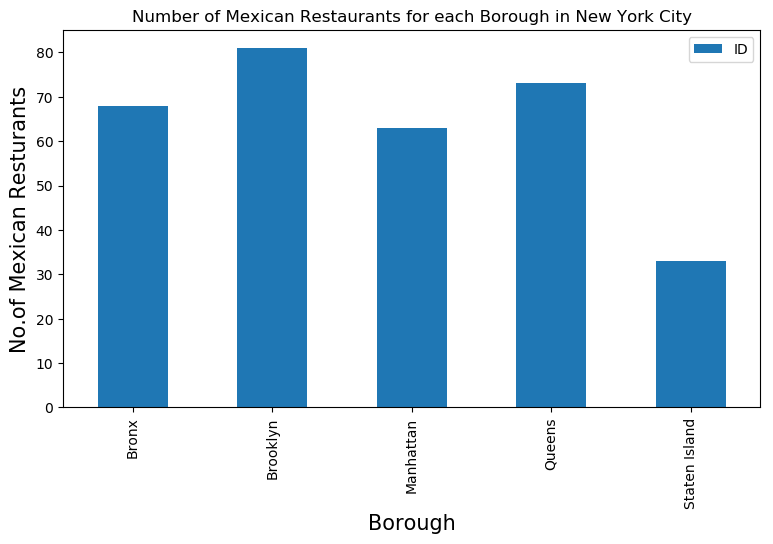

In [32]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Mexican Restaurants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Mexican Resturants', fontsize=15)
#giving a bar plot
Mexican_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We see that Brooklyn has the largest number of Mexican restaurants.

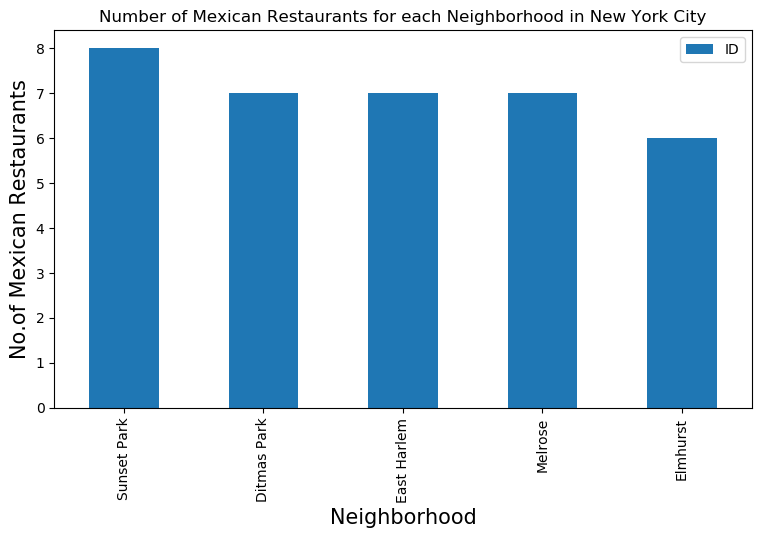

In [33]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Mexican Restaurants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Mexican Restaurants', fontsize=15)
#giving a bar plot
Mexican_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [34]:
Mexican_rest_ny[Mexican_rest_ny['Neighborhood']=='Sunset Park']

,Borough,Neighborhood,ID,Name
66,Brooklyn,Sunset Park,49bc364ff964a5201f541fe3,Tacos Matamoros
67,Brooklyn,Sunset Park,4b5415ecf964a520d3b127e3,Ricos Tacos
68,Brooklyn,Sunset Park,4b5cff55f964a520424e29e3,Maria's Bistro Mexicano
69,Brooklyn,Sunset Park,4c9521df82b56dcbc5fbd5aa,Tacos El Bronco
70,Brooklyn,Sunset Park,4bc25f7c461576b0fd5d7d32,Puebla Mini Market / Tortas a la Plancha Don Pepe
71,Brooklyn,Sunset Park,55a85c0f498ee3c735f1fa8d,Jalapeño Restaurant
72,Brooklyn,Sunset Park,4aa30695f964a520094320e3,Casa Vieja Restaurant
73,Brooklyn,Sunset Park,4d6d976d792bb60cbdd156be,Tulcingo Restaurant


So Sunset Park in Brooklyn has the highest number of Mexican Restaurants with a total count of 8. Now we will get the ranking of each restaurant for further analysis.

In [35]:
# prepare neighborhood list that contains Mexican restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
Mexican_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in Mexican_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these restaurants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(Mexican_rest_ny),')','processed')
    Mexican_rest_stats_ny = Mexican_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID                    Name  Likes  Rating  Tips
0  5c47a4b21953f3002c558218  Chipotle Mexican Grill      0     7.5     0
( 1 / 318 ) processed
                         ID                   Name  Likes  Rating  Tips
0  58582b156431e554e165d909  Moe's Southwest Grill      1     6.6     0
( 2 / 318 ) processed
                         ID          Name  Likes  Rating  Tips
0  523f6e14498ef6fdefc0d690  Burrito Shop     10     7.0     4
( 3 / 318 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4b78ba71f964a5209fdf2ee3  Santa Fe Grill & Bar     11     6.3    17
( 4 / 318 ) processed
                         ID           Name  Likes  Rating  Tips
0  590e5d2ce96d0c61de2dcf1d  Cocina Chente     13     8.8     5
( 5 / 318 ) processed
                         ID    Name  Likes  Rating  Tips
0  4db45c96fa8c350240e35919  Metate     19     6.6    10
( 6 / 318 ) processed
                         ID                  Name  Likes  Rating  Ti

In [36]:
Mexican_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Co-op City,5c47a4b21953f3002c558218,Chipotle Mexican Grill,0,7.5,0
1,Bronx,Co-op City,58582b156431e554e165d909,Moe's Southwest Grill,1,6.6,0
2,Bronx,Fieldston,523f6e14498ef6fdefc0d690,Burrito Shop,10,7.0,4
3,Bronx,Fieldston,4b78ba71f964a5209fdf2ee3,Santa Fe Grill & Bar,11,6.3,17
4,Bronx,Riverdale,590e5d2ce96d0c61de2dcf1d,Cocina Chente,13,8.8,5


In [37]:
Mexican_rest_stats_ny.shape

(318, 7)

In [38]:
Mexican_rest_ny.shape

(318, 4)

So we got data for all restaurants Now lets save this data to a csv sheet.

In [39]:
Mexican_rest_stats_ny.to_csv('Mexican_rest_stats_ny.csv', index=False)

In [40]:
Mexican_rest_stats_ny_csv=pd.read_csv('Mexican_rest_stats_ny.csv')

In [41]:
Mexican_rest_stats_ny_csv.shape

(318, 7)

In [42]:
Mexican_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Co-op City,5c47a4b21953f3002c558218,Chipotle Mexican Grill,0,7.5,0
1,Bronx,Co-op City,58582b156431e554e165d909,Moe's Southwest Grill,1,6.6,0
2,Bronx,Fieldston,523f6e14498ef6fdefc0d690,Burrito Shop,10,7.0,4
3,Bronx,Fieldston,4b78ba71f964a5209fdf2ee3,Santa Fe Grill & Bar,11,6.3,17
4,Bronx,Riverdale,590e5d2ce96d0c61de2dcf1d,Cocina Chente,13,8.8,5


In [43]:
Mexican_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
Borough         318 non-null object
Neighborhood    318 non-null object
ID              318 non-null object
Name            318 non-null object
Likes           318 non-null object
Rating          318 non-null float64
Tips            318 non-null object
dtypes: float64(1), object(6)
memory usage: 17.5+ KB


We see that values like Likes, Tips are string values. We would need to convert them into float for further analysis.

In [44]:
Mexican_rest_stats_ny['Likes']=Mexican_rest_stats_ny['Likes'].astype('float64')

In [45]:
Mexican_rest_stats_ny['Tips']=Mexican_rest_stats_ny['Tips'].astype('float64')

In [46]:
Mexican_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
Borough         318 non-null object
Neighborhood    318 non-null object
ID              318 non-null object
Name            318 non-null object
Likes           318 non-null float64
Rating          318 non-null float64
Tips            318 non-null float64
dtypes: float64(3), object(4)
memory usage: 17.5+ KB


In [48]:
# Resturant with maximum Likes
Mexican_rest_stats_ny.iloc[Mexican_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                Little Italy
ID              431e2d80f964a52079271fe3
Name                          La Esquina
Likes                               1978
Rating                                 9
Tips                                 720
Name: 168, dtype: object

In [49]:
# Resturant with maximum Rating
Mexican_rest_stats_ny.iloc[Mexican_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood                    Bushwick
ID              5a38273a005ac129b7a93010
Name                        La Loncheria
Likes                                 51
Rating                               9.2
Tips                                  15
Name: 93, dtype: object

In [50]:
# Resturant with maximum Tips
Mexican_rest_stats_ny.iloc[Mexican_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                Little Italy
ID              431e2d80f964a52079271fe3
Name                          La Esquina
Likes                               1978
Rating                                 9
Tips                                 720
Name: 168, dtype: object

Now let’s visualize neighbourhood with maximum average rating of restaurants

In [51]:
ny_neighborhood_stats=Mexican_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [52]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
78,Little Italy,9.000000
98,Noho,9.000000
40,East Village,9.000000
127,Soho,9.000000
48,Flatiron,8.900000
151,Windsor Terrace,8.800000
21,Chinatown,8.800000
60,Greenpoint,8.800000
58,Gramercy,8.766667
142,Upper East Side,8.700000


Above are the top neighbourhoods with top average rating of Mexican restaurants.

In [53]:
ny_borough_stats=Mexican_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [54]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.069841
1,Brooklyn,7.453086
3,Queens,7.439726
0,Bronx,6.751471
4,Staten Island,6.315152


Similarly these are the average rating of Mexican Restaurants for each Borough. Let’s visualize it.

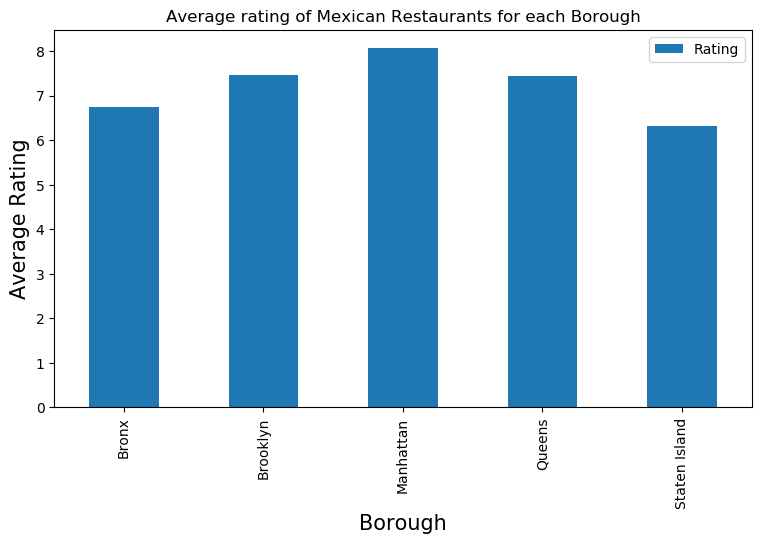

In [55]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Mexican Restaurants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
Mexican_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We will consider all the neighborhoods with average rating greater or equal 9.0 to visualize on map.

In [56]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=9.0]

In [57]:
ny_neighborhood_stats

,Neighborhood,Average Rating
40,East Village,9.0
78,Little Italy,9.0
98,Noho,9.0
127,Soho,9.0


In [58]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')

In [59]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [60]:
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Manhattan,East Village,40.727847,-73.982226,9.0
1,Manhattan,Little Italy,40.719324,-73.997305,9.0
2,Manhattan,Noho,40.723259,-73.988434,9.0
3,Manhattan,Soho,40.722184,-74.000657,9.0


Now we will show this data on a map.

In [61]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [62]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [63]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [64]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

Now that we have visualized the Neighbourhoods. Let’s Visualize Boroughs based on average Rating.

In [5]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
ny_geo = r'Borough Boundaries.geojson'

ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)

# display map
# as this is huge map data , we will save it to a file
ny_map.save('borough_rating.html')

The saved image can be downloaded at : https://github.com/Qaisar-prog/Coursera/blob/master/borough_rating.html

### __Conclusions__

1. East Village, Little Italy, and Noho in Manhattan are some of the best places for Mexican cuisine.
2. Manhattan have a potential Mexican Restaurant Market.
3. Staten Island ranks last in average rating of Mexican Restaurants.
4. Manhattan is the best place to stay if you prefer Mexican Cuisine.